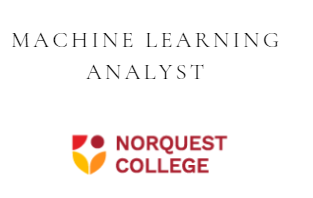

# Project Sample App

1. Load your cleaned dataset for EDA

2. Upload your Cleaned Location dataset for Map generation

3. Upload Norquest Logo for your Dashboard. (You can include other Stakeholder Logos )

4. Carry out EDA & ML Modelling.

5. PKL your best performing model. (Download a copy of this too)

6. Edit the Web App File code below

7. Deploy your App on the Local Tunnel.

8. Deploy your App Publicly (Github,Streamlit)

9. Record a Navigation of your app's functionalities to avoid hassles on Demo Day

10. Complete your Slides




### Step 1: Set Up Your Environment
1. **Install Required Libraries**: Ensure you have Python installed, then install Streamlit, Pandas, Plotly, Scikit-learn, Joblib, and Folium using pip:
   ```bash
   pip install streamlit pandas plotly scikit-learn joblib folium
   ```
2. **Prepare Your Dataset**: Have your dataset ready, ideally in CSV format. For this guide, we'll assume a dataset named `kijiji_cleaned_CSDUID.csv` with columns for latitude, longitude, price, type, and community name (CSDNAME).

### Step 2: Create Your Streamlit App
1. **Initialize Your App**: Create a new Python file for your app, e.g., `app.py`.
2. **Import Libraries**: At the top of `app.py`, import all the necessary libraries.
3. **Load Your Dataset**: Use Pandas to load your dataset. Utilize Streamlit's caching to speed up data loading:
   ```python
   @st.cache
   def load_data():
       return pd.read_csv('kijiji_cleaned_CSDUID.csv', encoding='latin1')
   data = load_data()
   ```

### Step 3: Build App Components
1. **Dashboard Page**:
   - Display an introduction, project abstract, and descriptions.
   - Use `st.image` for logos, `st.write` or `st.markdown` for text content.
2. **Exploratory Data Analysis (EDA) Page**:
   - Perform and show data visualizations using Plotly Express, such as histograms and box plots for price distribution.
3. **Machine Learning Modeling Page**:
   - Create interactive widgets (`st.selectbox`, `st.slider`) for input features.
   - Load a pre-trained model (ensure it's saved in the same directory) and use it to make predictions based on user inputs.
4. **Community Mapping Page**:
   - Use Plotly or Folium for mapping communities based on latitude and longitude. For Plotly, use `px.scatter_mapbox` for interactive maps.
5. **KMeans Clustering Page**:
   - Implement KMeans clustering on your data and visualize the clusters.
6. **Chatbot Page**:
   - Implement a simple chatbot functionality. For advanced implementations, you might integrate with external services or AI models.

### Step 4: Implement Navigation
1. Use `st.sidebar.radio` to let users choose between different pages of the app.
2. Implement a main function to control which page is displayed based on user selection.

### Step 5: Running Your Streamlit App
1. **Run Your App**: Navigate to your app's directory in the terminal and run:
   ```bash
   streamlit run app.py
   ```
2. **Interact With Your App**: Open the provided local URL in your web browser to interact with your app.

### Step 6: Additional Tips
- **Debugging**: Pay attention to error messages in the terminal; they can help identify issues with code or data.
- **Styling**: Explore Streamlit's API for ways to customize and style your app.
- **Deployment**: Consider deploying your app using Streamlit Sharing, Heroku, or another cloud service to make it accessible online.



# Recall Best Model

In [1]:
# load kijiji_cleaned.csv

import pandas as pd
data = pd.read_csv('kijiji_cleaned.csv')


In [2]:
data.head()

,CSDNAME,Latitude,Longitude,Type,Price,Bedrooms,Bathrooms,Hydro,Heat,Water,Size,Date Posted
0,South Glengarry,45.256161,-74.595385,Apartment,1425.0,2.0,1.0,0,1,1,950.0,2022-05-25 04:30:00
1,South Glengarry,45.192003,-74.374604,Apartment,1100.0,2.0,1.0,0,0,1,780.0,2022-05-18 12:34:00
2,South Glengarry,45.143726,-74.502708,House,1200.0,2.0,1.5,0,0,1,900.0,2022-05-16 15:41:00
3,South Glengarry,45.059039,-74.558464,Apartment,1695.0,1.0,1.0,1,1,1,850.0,2022-05-27 15:31:00
4,South Glengarry,45.135981,-74.619588,Apartment,1095.0,1.0,1.0,0,0,1,600.0,2022-07-22 17:42:00


Recall [Important Features ](https://colab.research.google.com/drive/1KV-mBsYoW87Ie-J4UAo1JxwlRBe5aJMe?usp=sharing)from ML results and choose only those

In [3]:
columns_to_drop = ['Latitude','Longitude','Date Posted', 'Hydro','Heat',	'Water']
data = data.drop(columns=columns_to_drop)

In [4]:
data.head()

,CSDNAME,Type,Price,Bedrooms,Bathrooms,Size
0,South Glengarry,Apartment,1425.0,2.0,1.0,950.0
1,South Glengarry,Apartment,1100.0,2.0,1.0,780.0
2,South Glengarry,House,1200.0,2.0,1.5,900.0
3,South Glengarry,Apartment,1695.0,1.0,1.0,850.0
4,South Glengarry,Apartment,1095.0,1.0,1.0,600.0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [6]:
# Convert categorical data to numeric using one-hot encoding
categorical_features = ['CSDNAME','Type']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [7]:

# Preprocessing for numerical features
numerical_features = ['Bedrooms', 'Bathrooms', 'Size']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [8]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [9]:
# Define feature matrix X and target y
X = data.drop('Price', axis=1)
y = data['Price']

In [10]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

# Create a pipeline that preprocesses the data and then fits a Random Forest regression model
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor())])
rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Bedrooms', 'Bathrooms',
                                                   'Size']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['CSDNAME', 'Type'])])),
                ('regressor', RandomForestRegressor())])

In [13]:
# Predicting the Test set results
y_pred = rf_model.predict(X_test)

# Evaluate the model using both Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 126925.4718502064
R-squared: 0.6131007176277651


In [14]:
!pip install joblib


In [15]:
import joblib

# Assuming 'random_forest' is your best trained Random Forest Regressor model
model = rf_model  # Replace with your actual model

# Specify the file path where you want to save the model
model_filename = 'random_forest_regressor_model.pkl'

# Save the model to a .pkl file
joblib.dump(model, model_filename)


['random_forest_regressor_model.pkl']

# Deployment

Files Needed for App to run
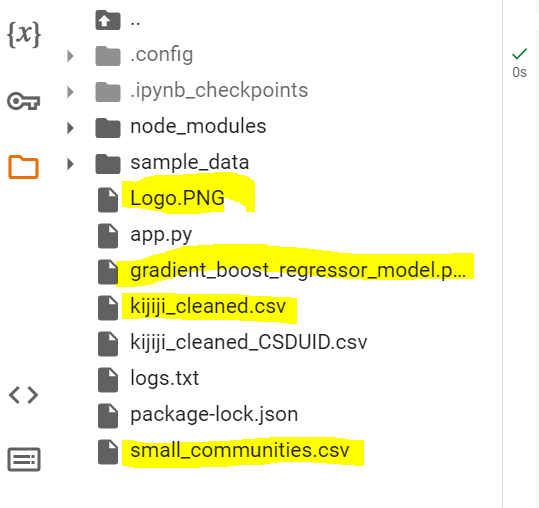

In [16]:
#install streamlit, one time execution
!pip install streamlit joblib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00


In [17]:
#import streamlit
import streamlit as st

In [18]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px
import joblib
import folium


# Load the dataset with a specified encoding
data = pd.read_csv('kijiji_cleaned.csv', encoding='latin1')

# Page 1: Dashboard
def dashboard():
    st.image('Logo.PNG', use_column_width=True)
    st.subheader("💡 Abstract:")
    inspiration = '''
      The Ontario Rental Market Data Analysis Using Machine Learning project seeks to analyze and understand the dynamics of the rental market in Ontario, Canada. Through comprehensive data collection and analysis, this project aims to provide valuable insights into rental prices, trends, and factors influencing the rental market. By leveraging machine learning techniques, predictive models will be developed to facilitate accurate rental price estimation based on various features. The deployment of these models will empower stakeholders with actionable information for making informed decisions regarding rental properties.
    '''
    st.write(inspiration)
    st.subheader("👨🏻‍💻 What our Project Does?")
    what_it_does = '''
  The project aims to analyze the rental market in Ontario, Canada, utilizing machine learning techniques. The project involves several phases, including data collection, exploratory data analysis (EDA), visualization, machine learning model development, and deployment. During the EDA phase, various statistical and visualization techniques will be employed to understand the underlying patterns, trends, and distributions within the rental market data. This will involve exploring factors such as rental prices, property types, geographical locations, amenities, and demographic variables. Following the EDA phase, machine learning algorithms will be trained on the collected data to develop predictive models. These models will be capable of estimating rental prices based on input features such as property characteristics, location, and other relevant factors. Finally, the developed models will be deployed to provide real-time insights into the Ontario rental market, allowing stakeholders such as renters, landlords, and policymakers to make informed decisions.
     '''
    st.write(what_it_does)

# Page 2: Exploratory Data Analysis (EDA)
def exploratory_data_analysis():
    st.title("Exploratory Data Analysis")

    # Price Distribution
    fig = px.histogram(data, x='Price', nbins=20, title='Distribution of Rental Prices')
    st.plotly_chart(fig)

    fig = px.bar(data, x='Price', y = 'Bedrooms', title='Price Distribution by Bedrooms')
    st.plotly_chart(fig)

    fig = px.bar(data, x='Price', y = 'Bathrooms', title='price Distribution by bathrooms')
    st.plotly_chart(fig)

    fig = px.box(data, x='Type', y='Price', title='Price Distribution by Property Type')
    st.plotly_chart(fig)

# Page 3: Machine Learning Modeling
def machine_learning_modeling():
    st.title("Kijiji Rental Price Prediction")
    st.write("Enter the details of the property to predict its rental price:")

    # Input fields for user to enter data
    property_type = st.selectbox("Type of Property", ['Apartment', 'House', 'Condo', 'Townhouse'])
    bedrooms = st.slider("Number of Bedrooms", 1, 5, 2)
    bathrooms = st.slider("Number of Bathrooms", 1, 3, 1)
    size = st.slider("Size (sqft)", 300, 5000, 1000)
    unique_locations = data['CSDNAME'].unique()
    location = st.selectbox("Location", unique_locations)

    if st.button("Predict"):
        # Load the trained model including preprocessing
        model = joblib.load('random_forest_regressor_model.pkl')

        # Assuming the model_with_preprocessing is a pipeline that ends with your estimator
        # Prepare input data as a DataFrame to match the training data structure
        input_df = pd.DataFrame({
            'Type': [property_type],
            'Bedrooms': [bedrooms],
            'Bathrooms': [bathrooms],
            'Size': [size],
            'CSDNAME': [location]
        })

        # Make prediction
        prediction = model.predict(input_df)

        # Display the prediction
        st.success(f"Predicted Rental Price: ${prediction[0]:,.2f}")

# Page 4: Community Mapping
def community_mapping():
    st.title("Small Communities Map: Population <10000")
    geodata = pd.read_csv("small_communities.csv")

    # Optional: Set your Mapbox token (if you want to use Mapbox styles)
    # px.set_mapbox_access_token('YOUR_MAPBOX_TOKEN_HERE')

    # Create the map using Plotly Express
    fig = px.scatter_mapbox(geodata,
                            lat='Latitude',
                            lon='Longitude',
                            color='Population',  # Color points by population, or choose another column
                            size='Price',  # Size points by price, or choose another column
                            color_continuous_scale=px.colors.cyclical.IceFire,
                            size_max=15,
                            zoom=10,
                            hover_name='Type',  # Display property type when hovering over points
                            hover_data={'Price': True, 'Population': True, 'Bathrooms': True, 'Bedrooms': True, 'Size': True, 'Latitude': False, 'Longitude': False},
                            title='Small Communities Map')

    fig.update_layout(mapbox_style="open-street-map")  # Use OpenStreetMap style
    st.plotly_chart(fig)


# Main App Logic
def main():
    st.sidebar.title("Kijiji Community App")
    app_page = st.sidebar.radio("Select a Page", ["Dashboard", "EDA", "ML Modeling", "Community Mapping"])

    if app_page == "Dashboard":
        dashboard()
    elif app_page == "EDA":
        exploratory_data_analysis()
    elif app_page == "ML Modeling":
        machine_learning_modeling()
    elif app_page == "Community Mapping":
        community_mapping()

if __name__ == "__main__":
    main()


Writing app.py


Note that we replaced the folium map with plotly's chart as plotly integrates better with Streamlit

In [19]:
import pandas as pd
import folium

# Read the CSV file into a Pandas DataFrame
geodata = pd.read_csv("small_communities.csv")

# Create a map object with the desired starting location and zoom level
map = folium.Map(location=[geodata['Latitude'].mean(), geodata['Longitude'].mean()], zoom_start=7, tiles="cartodb positron")

# Add markers to the map for each rental listing in df1
for index, row in geodata.iterrows():
    marker = folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"<b>{row['Type']}</b><br>Price: {row['Price']}<br>Population: {row['Population']}<br> {row['Bedrooms']}<br>{row['Bathrooms']}<br>Size: {row['Size']}"
    )
    map.add_child(marker)

# Display the map
map

In [20]:
 import plotly.express as px

 def community_mapping():
     st.title("Small Communities Map: Population <10000")
     geodata = pd.read_csv("small_communities.csv")
# Create the map using Plotly Express
 fig = px.scatter_mapbox(geodata,
                            lat='Latitude',
                            lon='Longitude',
                            color='Population',  # Color points by population, or choose another column
                            size='Price',  # Size points by price, or choose another column
                            color_continuous_scale=px.colors.cyclical.IceFire,
                            size_max=15,
                            zoom=10,
                            hover_name='Type',  # Display property type when hovering over points
                            hover_data={'Price': True, 'Population': True, 'Bathrooms': True, 'Bedrooms': True, 'Size': True, 'Latitude': False, 'Longitude': False},
                            title='Small Communities Map' )

    # Update the map layout
 fig.update_layout(mapbox_style="open-street-map")  # Use OpenStreetMap style

    # Display the map
 st.plotly_chart(fig)

2024-04-18 05:34:07.454 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


DeltaGenerator()

## Install localtunnel

In [21]:
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm notice created a lockfile as package-lock.json. You should commit this file.
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
added 22 packages from 22 contributors and audited 22 packages in 2.392s

3 packages are looking for funding
  run `npm fund` for details

found 1 moderate severity vulnerability
  run `npm audit fix` to fix them, or `npm audit` for details


## Run streamlit in background

In [22]:
!streamlit run /content/app.py &>/content/logs.txt & curl ipv4.icanhazip.com

34.106.244.23


Copy this IP address.

## Expose the port 8501
Then just click in the `url` showed.

A `log.txt`file will be created.

In [ ]:
!npx localtunnel --port 8501

npx: installed 22 in 4.028s
your url is: https://fifty-regions-call.loca.lt


# Sample Deployed Page

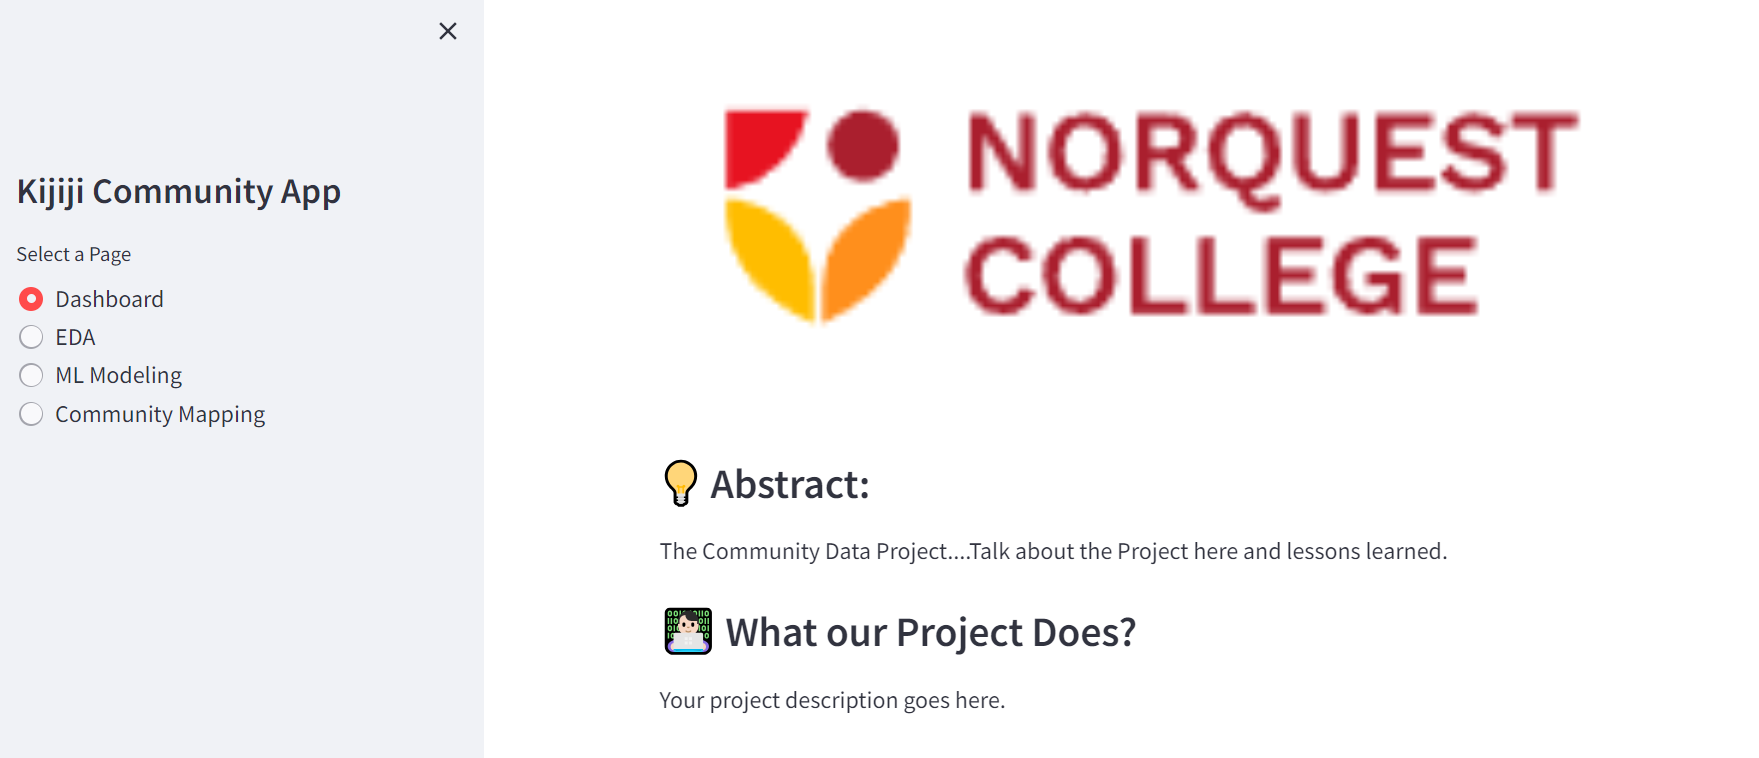

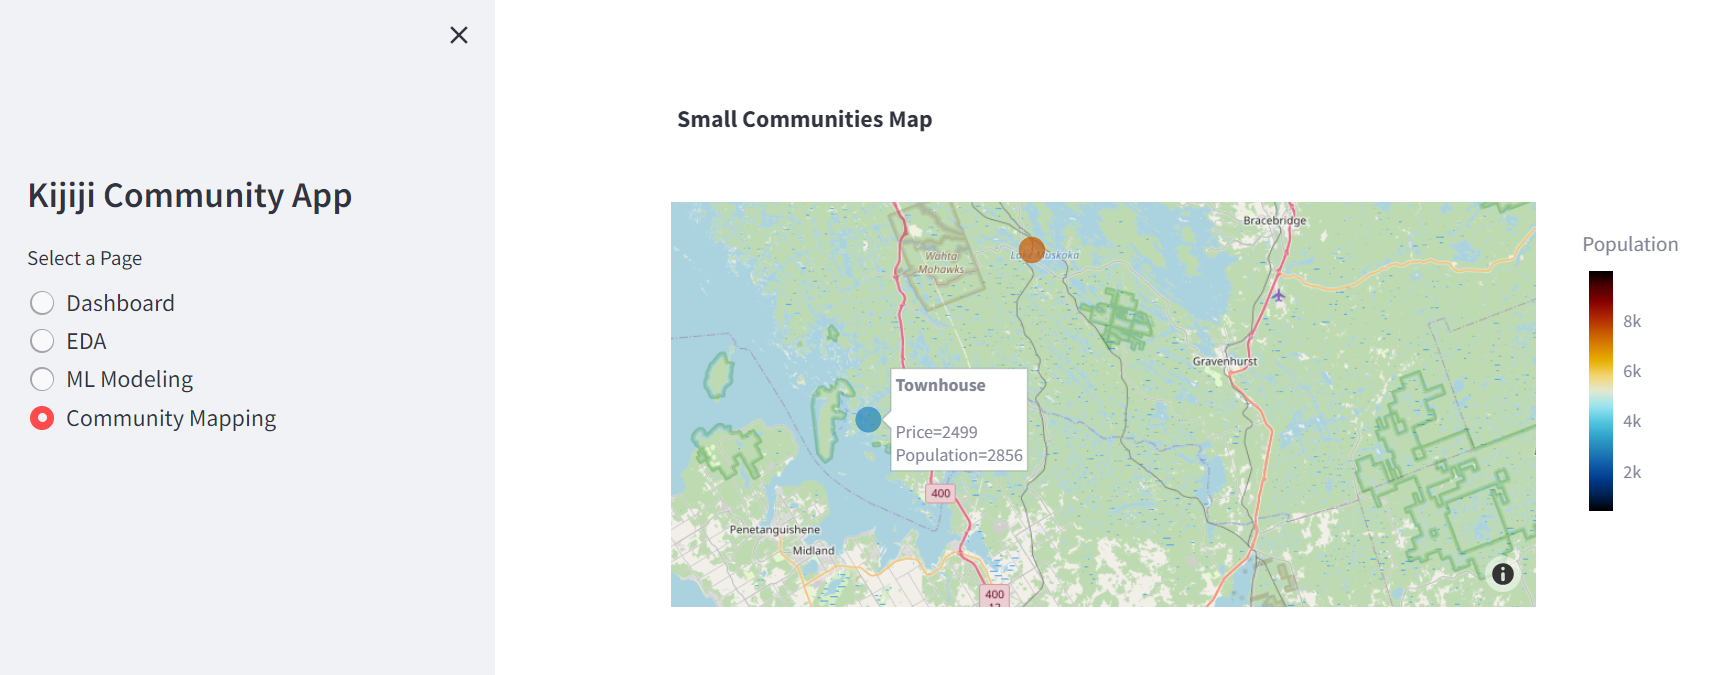

# References


1.https://www.youtube.com/watch?v=8M20LyCZDOY&list=PLtqF5YXg7GLmCvTswG32NqQypOuYkPRUE&index=2

2. https://github.com/dataprofessor/code/blob/master/streamlit/part2/iris-ml-app.py

3. https://colab.research.google.com/github/mrm8488/shared_colab_notebooks/blob/master/Create_streamlit_app.ipynb#scrollTo=IFvZnzS4vr88 for ngrok